# Multi-target tracking

Quantum computing has the potential to revolutionize certain computational tasks, and multi-target tracking is no exception. Leveraging quantum computing for multi-target tracking involves exploiting quantum algorithms to enhance the efficiency of computations that are challenging for classical computers. Let's break down how quantum computing can be applied to multi-target tracking using tensor decomposition of a probability function, Bayesian prediction, and the Fokker-Planck equation (FPE).

1. **Tensor Decomposition of Probability Function (PDF):**
   - **Quantum Parallelism:** Quantum computing can perform parallel computations on all possible combinations of states simultaneously. This is particularly advantageous for tensor decomposition, where the quantum superposition allows for the exploration of multiple combinations at once.
   - **Quantum Tensor Networks:** Quantum computers can efficiently handle large-scale tensor operations, which are common in the decomposition of high-dimensional probability functions. Quantum tensor networks can represent and manipulate complex probability distributions more efficiently than classical methods.

2. **Bayesian Prediction:**
   - **Quantum Bayesian Networks:** Quantum computing can be used to represent and manipulate Bayesian networks more efficiently than classical systems. Quantum Bayesian networks can handle the probabilistic dependencies between different variables in a way that exploits quantum superposition and entanglement.
   - **Quantum Sampling:** Quantum computers can sample from probability distributions more efficiently than classical computers, which is a crucial aspect of Bayesian prediction. This can accelerate the process of generating samples for Bayesian inference.

3. **Bayesian Update Cycle:**
   - **Quantum Bayesian Inference:** Quantum algorithms, such as quantum Bayesian networks and quantum versions of Markov Chain Monte Carlo (MCMC) algorithms, can be employed to update the probability distribution over time as new information becomes available. This enables a more efficient Bayesian update cycle compared to classical methods.

4. **Fokker-Planck Equation (FPE):**
   - **Quantum Simulation:** Quantum computers can simulate the time evolution described by the Fokker-Planck equation more efficiently than classical computers for certain systems. This allows for a quantum-enhanced understanding of the time evolution of the state in the context of multi-target tracking.
   - **Quantum Walks:** Quantum walks, a quantum analogue of classical random walks, can be used to model and simulate the evolution of probabilities over time. This can be advantageous for understanding the dynamics described by the Fokker-Planck equation.

In summary, by harnessing the unique properties of quantum computing, such as superposition, entanglement, and quantum parallelism, it is possible to enhance the efficiency of computations involved in tensor decomposition, Bayesian prediction, and the Fokker-Planck equation. This, in turn, can lead to more effective and faster multi-target tracking algorithms in certain scenarios.

# 1. Simple bayesian prediction
 In this example, let's consider a simple scenario where we are tracking the position of a target along a one-dimensional line. We'll use a Gaussian distribution to represent the probability distribution over possible positions. The target undergoes a simple constant velocity motion.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


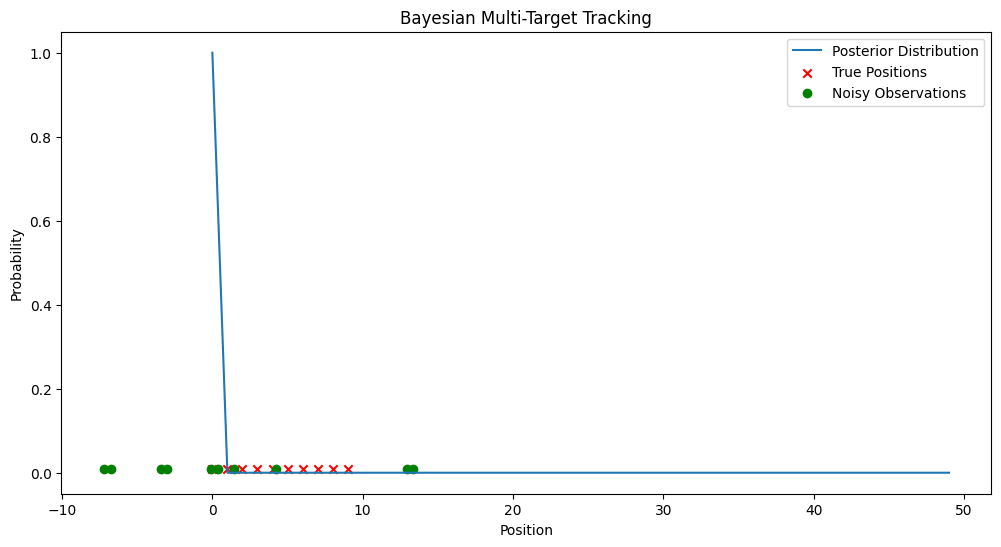

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initial_state(num_positions):
    # Initial probability distribution (uniform)
    return np.ones(num_positions) / num_positions

def predict_state(prior_prob, velocity):
    # Predict the next state based on constant velocity motion
    num_positions = len(prior_prob)
    transition_matrix = np.eye(num_positions)
    for i in range(num_positions):
        # I don't understand the construction of the transition matrix.
        # Why i * velocity, why np.roll?
        transition_matrix[i, :] = np.roll(transition_matrix[i, :], i * velocity)
    # print(transition_matrix)
    predicted_prob = np.dot(transition_matrix, prior_prob)
    return predicted_prob

def update_state(predicted_prob, observation, observation_noise):
    # Update the state based on the observation
    likelihood = np.exp(-0.5 * ((np.arange(len(predicted_prob)) - observation) / observation_noise)**2)
    posterior_prob = likelihood * predicted_prob
    posterior_prob /= np.sum(posterior_prob)  # Normalize
    return posterior_prob

# Simulation parameters
num_positions = 50
velocity = 1
observation_noise = 5
num_steps = 10


# Initialize
true_positions = np.zeros(num_steps)
observations = np.zeros(num_steps)
prior_prob = initial_state(num_positions)

# test code felix
init_state_2 = np.zeros(num_positions)
init_state_2[int(num_positions/2)] = 1

# This indicates a bug, since p_plus is only zeros
print(init_state_2)
p_plus = predict_state(init_state_2, 1)
print(p_plus)

# Run the Bayesian update cycle
for step in range(num_steps):
    # True target position update (constant velocity)
    true_positions[step] = step * velocity

    # Generate noisy observation
    observations[step] = true_positions[step] + np.random.normal(0, observation_noise)

    # Bayesian prediction
    predicted_prob = predict_state(prior_prob, velocity)

    # Bayesian update
    prior_prob = update_state(predicted_prob, observations[step], observation_noise)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_positions), prior_prob, label='Posterior Distribution')
plt.scatter(true_positions, np.ones_like(true_positions) * 0.01, color='r', marker='x', label='True Positions')
plt.scatter(observations, np.ones_like(observations) * 0.01, color='g', marker='o', label='Noisy Observations')
plt.title('Bayesian Multi-Target Tracking')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.show()


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Mean Squared Error (MSE): 808.5
Symmetric Mean Absolute Percentage Error (SMAPE): 1.96
Mean Absolute Percentage Error (MAPE): 98.0
R-squared (R2): -2.8823529411764706
Mean Absolute Error (MAE): 24.5


C:\Users\sueno_paraiso\AppData\Local\Temp\ipykernel_16008\2662178869.py:63: RuntimeWarning: invalid value encountered in divide
  smape = np.mean(np.nan_to_num(smape_numerator / smape_denominator))
C:\Users\sueno_paraiso\AppData\Local\Temp\ipykernel_16008\2662178869.py:68: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.nan_to_num(mape_numerator / mape_denominator)) * 100


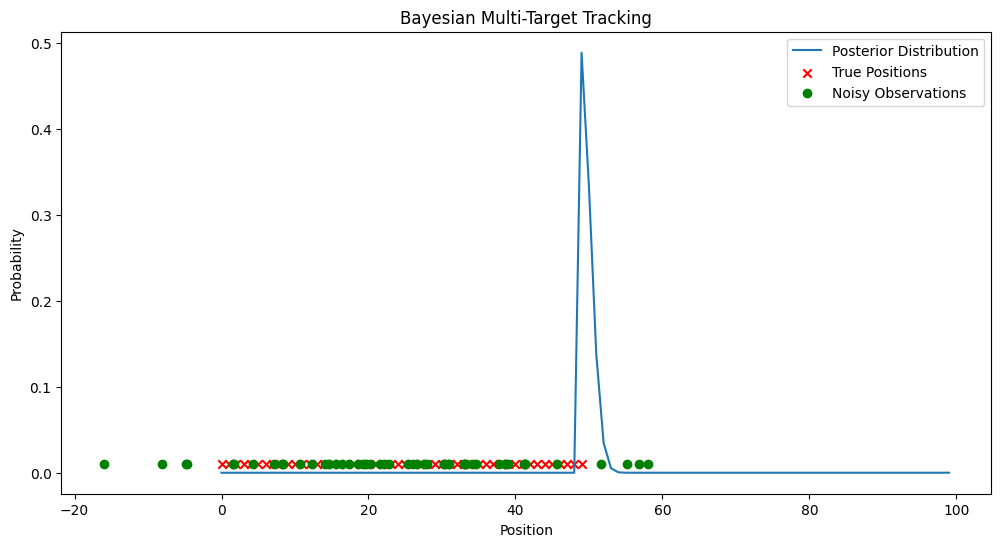

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def initial_state(num_positions):
    return np.ones(num_positions) / num_positions

def predict_state(prior_prob, velocity):
    num_positions = len(prior_prob)
    predicted_prob = np.zeros(num_positions)
    for i in range(num_positions):
        predicted_prob[i] = prior_prob[(i - velocity) % num_positions]
    return predicted_prob

def update_state(predicted_prob, observation, observation_noise):
    likelihood = np.exp(-0.5 * ((np.arange(len(predicted_prob)) - observation) / observation_noise)**2)
    posterior_prob = likelihood * predicted_prob
    posterior_prob /= np.sum(posterior_prob)  # Normalize
    return posterior_prob

# Simulation parameters
num_positions = 100
velocity = 1
observation_noise = 10
num_steps = 50

# Initialize
true_positions = np.zeros(num_steps)
observations = np.zeros(num_steps)
prior_prob = initial_state(num_positions)

# Test initial state
init_state_2 = np.zeros(num_positions)
init_state_2[int(num_positions/2)] = 1
print(init_state_2)
p_plus = predict_state(init_state_2, 1)
print(p_plus)

# Initialize
true_positions = np.zeros(num_steps)
observations = np.zeros(num_steps)
estimated_positions = np.zeros(num_steps)  # Store estimated positions

# Run the Bayesian update cycle
for step in range(num_steps):
    # True target position update (constant velocity)
    true_positions[step] = step * velocity

    # Generate noisy observation
    observations[step] = true_positions[step] + np.random.normal(0, observation_noise)

    # Bayesian prediction
    predicted_prob = predict_state(prior_prob, velocity)

    # Bayesian update
    prior_prob = update_state(predicted_prob, observations[step], observation_noise)

# Calculate Metrics
mse = np.mean((true_positions - estimated_positions) ** 2)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape_numerator = 2 * np.abs(estimated_positions - true_positions)
smape_denominator = np.abs(estimated_positions) + np.abs(true_positions)
smape = np.mean(np.nan_to_num(smape_numerator / smape_denominator))

# Mean Absolute Percentage Error (MAPE)
mape_numerator = np.abs(estimated_positions - true_positions)
mape_denominator = np.abs(true_positions)
mape = np.mean(np.nan_to_num(mape_numerator / mape_denominator)) * 100

r2 = 1 - np.sum((true_positions - estimated_positions) ** 2) / np.sum((true_positions - np.mean(true_positions)) ** 2)
mae = np.mean(np.abs(true_positions - estimated_positions))

# Print Metrics
print("Mean Squared Error (MSE):", mse)
print("Symmetric Mean Absolute Percentage Error (SMAPE):", smape)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_positions), prior_prob, label='Posterior Distribution')
plt.scatter(true_positions, np.ones_like(true_positions) * 0.01, color='r', marker='x', label='True Positions')
plt.scatter(observations, np.ones_like(observations) * 0.01, color='g', marker='o', label='Noisy Observations')
plt.title('Bayesian Multi-Target Tracking')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.show()
